<a href="https://colab.research.google.com/github/gcasaldi/CS50/blob/main/Copia_di_Untitledverso2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: importa librerie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User  uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

# Use the correct filename from the uploaded files
filename = 'db superenalotto.txt'  # This is the correct filename

try:
    df = pd.read_csv(filename, sep='\t')  # Adjust the separator if necessary
    print(df.head())
except FileNotFoundError:
    print(f"Error: File '{filename}' not found. Please upload the correct file.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Please check the file format.")

Saving db superenalotto.txt to db superenalotto (1).txt
User  uploaded file "db superenalotto (1).txt" with length 16220 bytes
  2025   1°  2°  3°  4°  5°  6° - Jolly  - Superstar   Conc.
0  02 gen  19  21  29  74  77  88     07         ...        
1  03 gen  13  30  43  49  74  89     04         ...        
2  04 gen  31  42  43  63  83  86     37         ...        
3  07 gen  07  10  11  29  32  87     34         ...        
4  09 gen  15  33  40  71  74  82     89         ...        


Data Cleaning

In [ ]:
# Check for missing values
print(df.head(10))  # Print the first 10 rows to inspect the data

  2025   1°  2°  3°  4°  5°  6° - Jolly  - Superstar   Conc.
0  02 gen  19  21  29  74  77  88     07         ...        
1  03 gen  13  30  43  49  74  89     04         ...        
2  04 gen  31  42  43  63  83  86     37         ...        
3  07 gen  07  10  11  29  32  87     34         ...        
4  09 gen  15  33  40  71  74  82     89         ...        
5  10 gen  19  25  33  49  57  72     46         ...        
6  11 gen  05  06  11  22  35  85     30         ...        
7  14 gen  04  15  17  40  64  75     23         ...        
8  16 gen  31  38  59  69  72  88     64         ...        
9  17 gen  08  12  15  40  66  89     07         ...        


Check Column Names

In [ ]:
print(df.columns)  # Print the column names

Index([' 2025   1°  2°  3°  4°  5°  6° - Jolly  - Superstar   Conc.'], dtype='object')


provo ad allenare

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each number
accuracies = []
for i in range(y_test.shape[1]):  # Loop through each output column
    acc = accuracy_score(y_test[:, i], predictions[:, i])
    accuracies.append(acc)

# Average accuracy
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy:.2f}')

# Print individual accuracies
for i, acc in enumerate(accuracies):
    print(f'Accuracy for N{i+1}: {acc:.2f}')

Average Accuracy: 0.02
Accuracy for N1: 0.04
Accuracy for N2: 0.00
Accuracy for N3: 0.00
Accuracy for N4: 0.00
Accuracy for N5: 0.00
Accuracy for N6: 0.08


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the data
file_path = "/content/db superenalotto (1).txt"

# Read the file
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Step 2: Extract numbers using regex
draws = []
pattern = re.compile(r"(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)")
for line in lines:
    match = pattern.search(line)
    if match:
        numbers = list(map(int, match.groups()))
        draws.append(numbers)

# Step 3: Create DataFrame
df = pd.DataFrame(draws, columns=["N1", "N2", "N3", "N4", "N5", "N6"])

# Step 4: Prepare features and target variable
X = []
y = []

# Create features and target
for i in range(len(df) - 1):
    X.append(df.iloc[i].values)  # Previous draw numbers
    y.append(df.iloc[i + 1].values)  # Next draw numbers

X = np.array(X)
y = np.array(y)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Step 7: Make predictions
predictions = model.predict(X_test)

# Step 8: Calculate accuracy for each number
accuracies = []
for i in range(y_test.shape[1]):  # Loop through each output column
    acc = accuracy_score(y_test[:, i], predictions[:, i])
    accuracies.append(acc)

# Average accuracy
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy:.2f}')

# Print individual accuracies
for i, acc in enumerate(accuracies):
    print(f'Accuracy for N{i+1}: {acc:.2f}')

Average Accuracy: 0.02
Accuracy for N1: 0.02
Accuracy for N2: 0.02
Accuracy for N3: 0.00
Accuracy for N4: 0.02
Accuracy for N5: 0.00
Accuracy for N6: 0.06


Most Frequent Numbers:
    Number  Frequency
84      85         27
22      23         26
42      43         25
33      34         24
12      13         23
71      72         23

Least Frequent Numbers:
    Number  Frequency
11      12          8
36      37         10
37      38         10
64      65         10
8        9         11
55      56         11

Mean: 45.94
Median: 46.00
Mode: [85] (Frequency: [27])


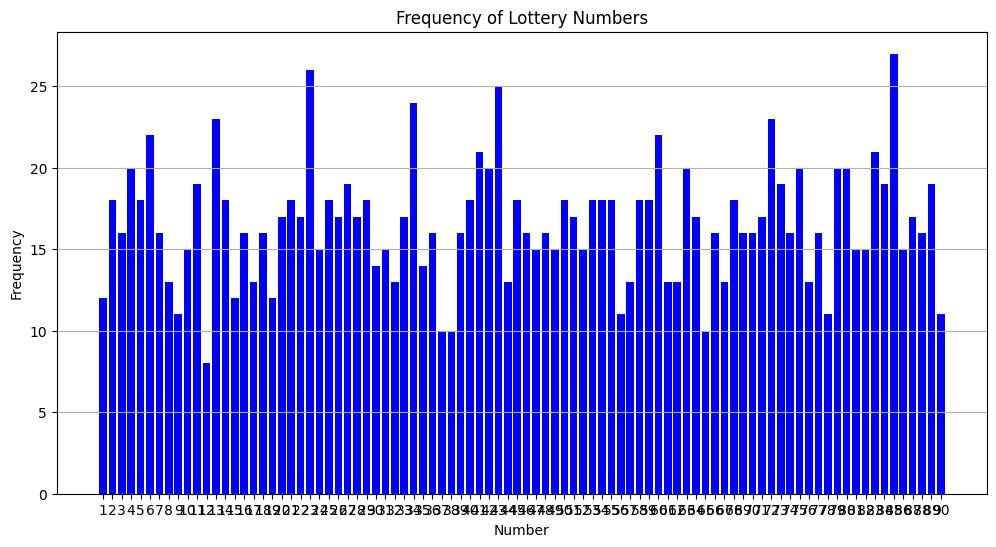


Predicted Next Draw Numbers: [85 23 43 34 13 72]


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = "/content/db superenalotto (1).txt"

# Read the file
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Step 2: Extract numbers using regex
draws = []
pattern = re.compile(r"(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)")
for line in lines:
    match = pattern.search(line)
    if match:
        numbers = list(map(int, match.groups()))
        draws.append(numbers)

# Step 3: Create DataFrame
df = pd.DataFrame(draws, columns=["N1", "N2", "N3", "N4", "N5", "N6"])

# Step 4: Calculate frequency of each number
all_numbers = df.values.flatten()
unique, counts = np.unique(all_numbers, return_counts=True)
frequency = dict(zip(unique, counts))

# Convert frequency dictionary to DataFrame for easier manipulation
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Number', 'Frequency'])

# Step 5: Identify most and least frequent numbers
most_frequent = frequency_df.nlargest(6, 'Frequency')
least_frequent = frequency_df.nsmallest(6, 'Frequency')

# Step 6: Calculate descriptive statistics
mean = np.mean(all_numbers)
median = np.median(all_numbers)
mode = frequency_df.loc[frequency_df['Frequency'] == frequency_df['Frequency'].max()]

# Step 7: Print results
print("Most Frequent Numbers:")
print(most_frequent)

print("\nLeast Frequent Numbers:")
print(least_frequent)

print(f"\nMean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode['Number'].values} (Frequency: {mode['Frequency'].values})")

# Step 8: Visualize the frequency of numbers
plt.figure(figsize=(12, 6))
plt.bar(frequency_df['Number'], frequency_df['Frequency'], color='blue')
plt.title('Frequency of Lottery Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.xticks(range(1, 91))  # Assuming numbers range from 1 to 90
plt.grid(axis='y')
plt.show()

# Step 9: Final Prediction based on most frequent numbers
predicted_numbers = most_frequent['Number'].values
print("\nPredicted Next Draw Numbers:", predicted_numbers)

In [ ]:
import pandas as pd
import numpy as np

# Caricamento del file
file_path = "/content/db superenalotto (1).txt"

# Lettura del file
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Estrazione dei numeri dalle righe
draws = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:  # Deve contenere almeno i sei numeri principali, Jolly e Superstar
        try:
            numbers = list(map(int, parts[1:7]))  # I primi 6 numeri principali
            draws.append(numbers)
        except ValueError:
            continue  # Salta righe che non contengono numeri validi

# Creazione DataFrame
df = pd.DataFrame(draws, columns=["N1", "N2", "N3", "N4", "N5", "N6"])

# Calcolo della frequenza di ciascun numero
all_numbers = df.values.flatten()
unique, counts = np.unique(all_numbers, return_counts=True)
number_freq = dict(zip(unique, counts))

# Selezione dei 6 numeri più frequenti
predicted_numbers = sorted(number_freq, key=number_freq.get, reverse=True)[:6]
predicted_numbers


[]

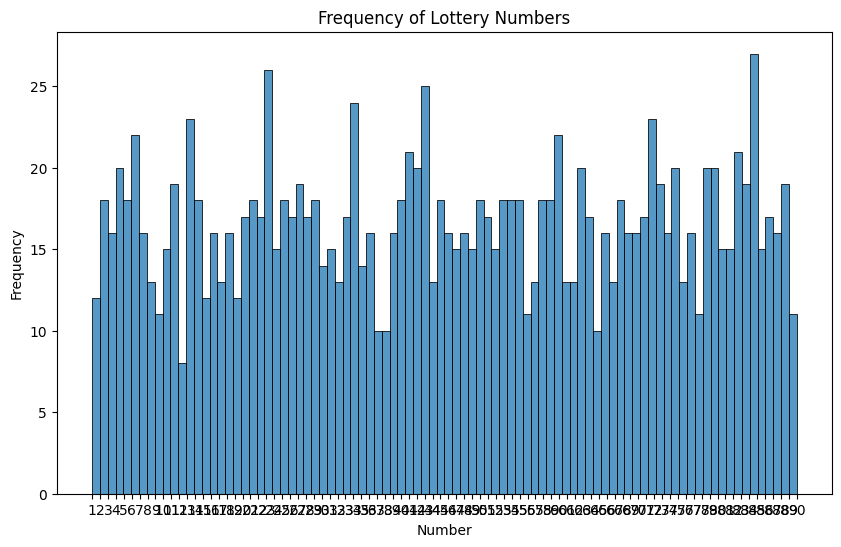

Predicted Numbers: [85, 23, 43, 34, 13, 72]
Hot Numbers: [85, 23, 43, 34, 13, 72]
Cold Numbers: [12, 37, 38, 65, 9, 56]


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
file_path = "/content/db superenalotto (1).txt"

# Read the file
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Extract numbers using regex
draws = []
pattern = re.compile(r"(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)")
for line in lines:
    match = pattern.search(line)
    if match:
        numbers = list(map(int, match.groups()))
        draws.append(numbers)

# Create DataFrame
df = pd.DataFrame(draws, columns=["N1", "N2", "N3", "N4", "N5", "N6"])

# Calculate frequency of each number
all_numbers = df.values.flatten()
unique, counts = np.unique(all_numbers, return_counts=True)
number_freq = dict(zip(unique, counts))

# Select the 6 most frequent numbers
predicted_numbers = sorted(number_freq, key=number_freq.get, reverse=True)[:6]

# Visualization of number frequency
plt.figure(figsize=(10, 6))
sns.histplot(all_numbers, bins=90, kde=False)
plt.title('Frequency of Lottery Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.xticks(range(1, 91))  # Adjust based on the range of lottery numbers
plt.show()

# Print predicted numbers
print("Predicted Numbers:", predicted_numbers)

# Additional analysis: Hot and Cold Numbers
hot_numbers = sorted(number_freq.items(), key=lambda x: x[1], reverse=True)[:6]
cold_numbers = sorted(number_freq.items(), key=lambda x: x[1])[:6]

print("Hot Numbers:", [num for num, freq in hot_numbers])
print("Cold Numbers:", [num for num, freq in cold_numbers])